<a href="https://colab.research.google.com/github/vanand102/Final_Stroke-Data-Analysis/blob/main/Capstone2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

In [33]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
#Import folder
import sys
sys.path.append('/content/drive/MyDrive/Springboard/Capstone 2')

In [35]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from scipy.stats import stats
import os
import numpy as np


from library.sb_utils import save_file

In [36]:
# the supplied CSV data file is the raw_data directory
stroke_data = pd.read_csv('/content/drive/MyDrive/Springboard/Capstone 2/stroke_data_2.csv')

In [37]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [38]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [39]:
stroke_data["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Below we have a bar chart showing Heart Disease in relation to strokes. Noted that the data includes significantly more individuals without heart disease. Based on the data that we have, it appears that people with heart disease have had a significantly higher ratio of strokes.

,stroke
heart_disease,
0,0.041787
1,0.170290


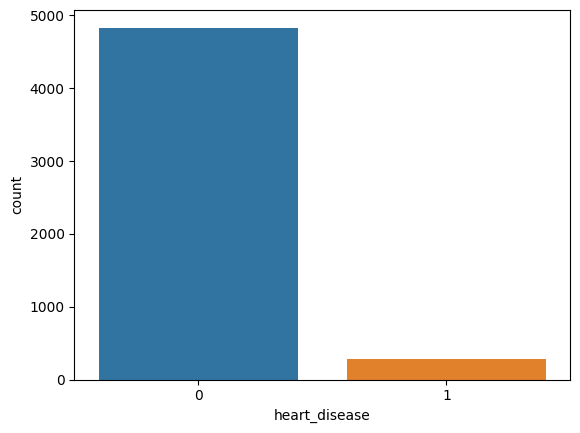

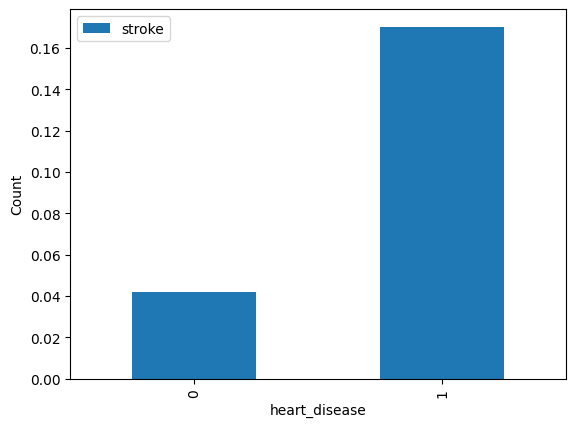

In [40]:
sns.countplot(x=stroke_data['heart_disease'])

stroke_data.groupby(['heart_disease'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
stroke_data.groupby(['heart_disease'])[['stroke']].mean()

Heart Disease chi-squared test

In [41]:
# https://www.askpython.com/python/examples/chi-square-test
chisqt = pd.crosstab(stroke_data.heart_disease, stroke_data.stroke, margins=True)

print(chisqt)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(value)
print(chi2_contingency(value)[0:3])

stroke            0    1   All
heart_disease                 
0              4632  202  4834
1               229   47   276
All            4861  249  5110
[[4632  202 4834]
 [ 229   47  276]]
(93.01112941392964, 6.351698426682723e-21, 2)


Below we have a bar chart showing hypertension in relation to strokes. Noted that the data includes significantly more individuals without hypertension. Based on the data that we have, it appears that people with hypertension have had a significantly higher ratio of strokes.

,stroke
hypertension,
0,0.039679
1,0.132530


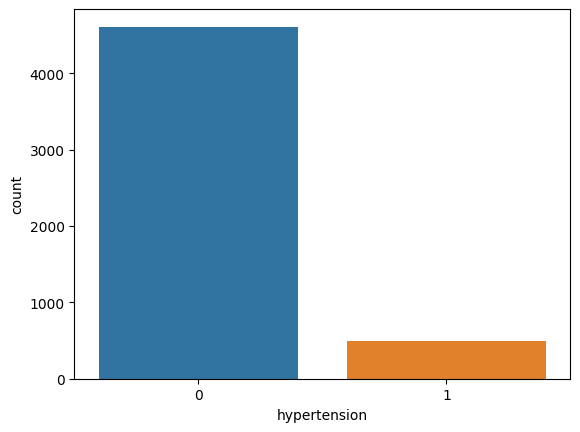

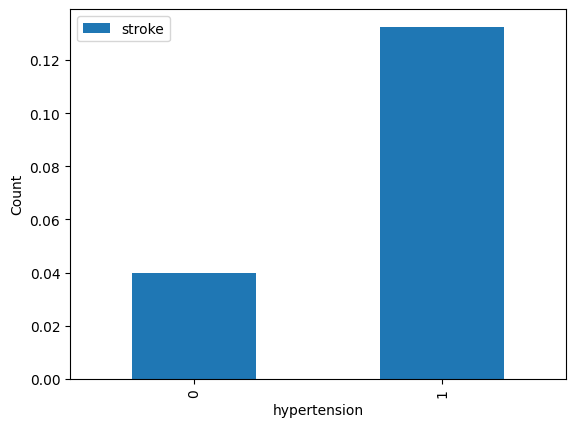

In [42]:
sns.countplot(x=stroke_data['hypertension'])

stroke_data.groupby(['hypertension'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
stroke_data.groupby(['hypertension'])[['stroke']].mean()

Hypertension chi-squared test

In [43]:
chisqt = pd.crosstab(stroke_data.hypertension, stroke_data.stroke, margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

(83.59647297303054, 7.034877520346069e-19, 2)


Below we have a bar chart showing Ever Married in relation to strokes. Noted that the data includes more individuals who were married. Based on the data that we have, it appears that people who were married have had a higher ratio of strokes.

,stroke
ever_married,
No,0.016505
Yes,0.065613


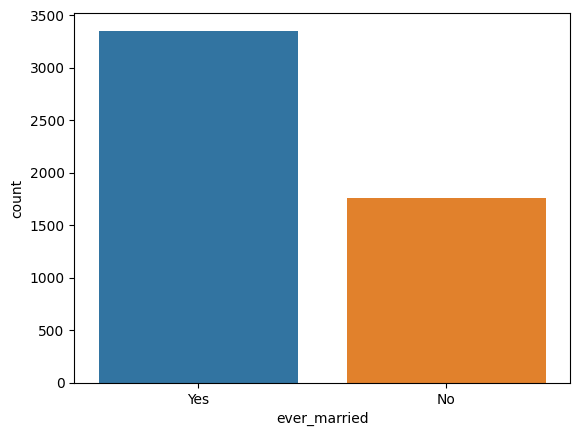

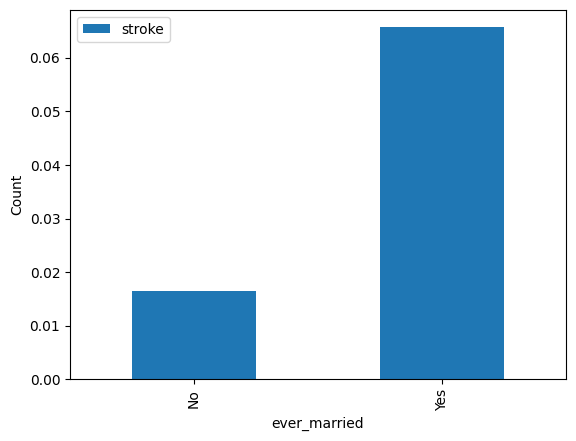

In [44]:
sns.countplot(x=stroke_data['ever_married'])

stroke_data.groupby(['ever_married'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
stroke_data.groupby(['ever_married'])[['stroke']].mean()

Ever Married chi-squared test

In [45]:
chisqt = pd.crosstab(stroke_data.ever_married, stroke_data.stroke, margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

(59.978623069992466, 9.458178026759999e-14, 2)


Below we have a bar chart showing Gender in relation to strokes. Noted that the data includes slightly more females. Based on the data that we have, it appears that males have had a slightly higher ratio of strokes.

,stroke
gender,
Female,0.047094
Male,0.051064
Other,0.000000


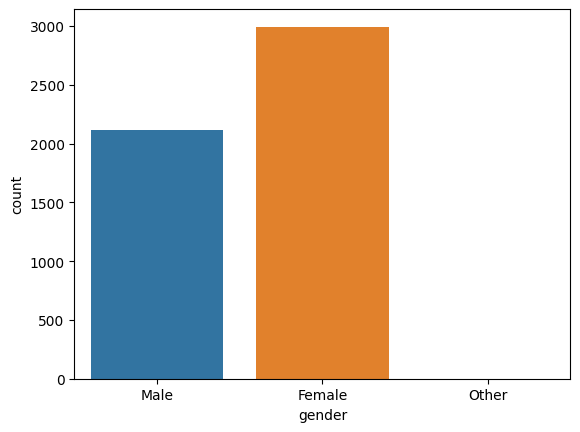

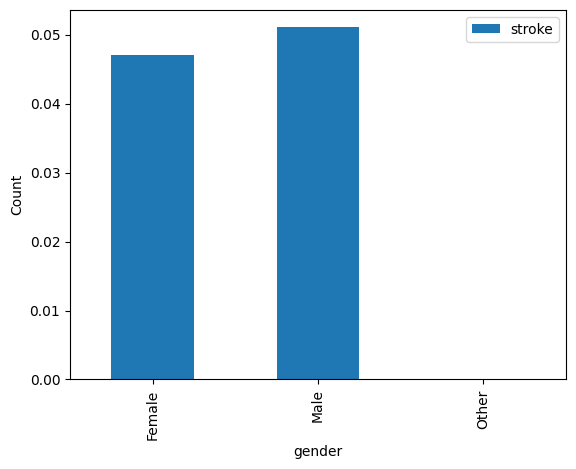

In [46]:
sns.countplot(x=stroke_data['gender'])

stroke_data.groupby(['gender'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
stroke_data.groupby(['gender'])[['stroke']].mean()

Gender chi-squared test

In [47]:
chisqt = pd.crosstab(stroke_data.gender, stroke_data.stroke, margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

(0.4212743419562929, 0.8100679297216449, 2)


Below we have a bar chart showing Residence Type in relation to strokes. Noted that the data includes roughly 50/50 individuals who live in an urban residence type vs Rural. Based on the data that we have, it appears that individuals in urban residences have had a slightly higher ratio of strokes.

,stroke
Residence_type,
Rural,0.045346
Urban,0.052003


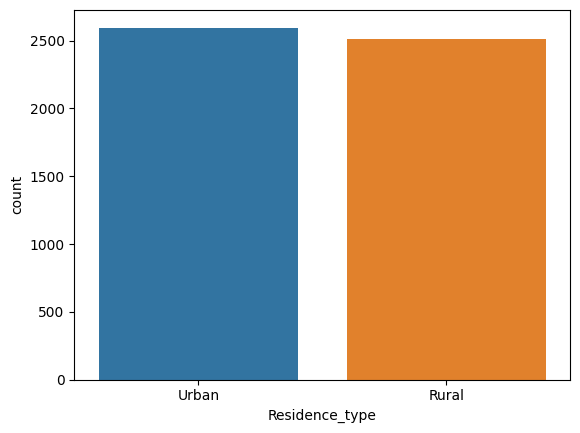

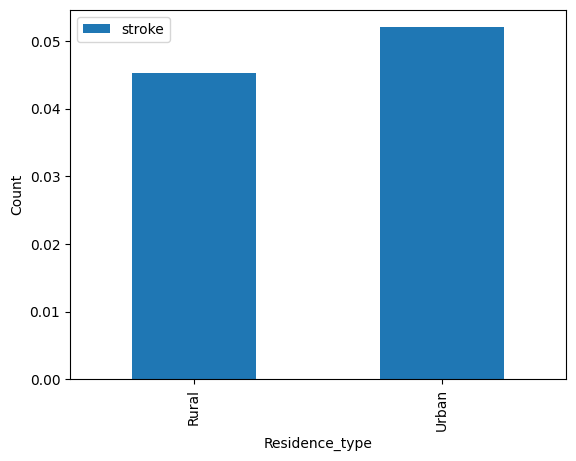

In [48]:
sns.countplot(x=stroke_data['Residence_type'])

stroke_data.groupby(['Residence_type'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
stroke_data.groupby(['Residence_type'])[['stroke']].mean()

Residence Type chi-squared test

In [49]:
chisqt = pd.crosstab(stroke_data.Residence_type, stroke_data.stroke, margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

(1.2210278401168941, 0.5430717019050562, 2)


Below we have a bar chart showing Work Type in relation to strokes. Noted that the data has is distributed heavily towards the "private" work type. Based on the data that we have, it appears that individuals who are self employed have had a higher ratio of strokes.

,stroke
work_type,
Govt_job,0.050228
Never_worked,0.000000
Private,0.050940
Self-employed,0.079365
children,0.002911


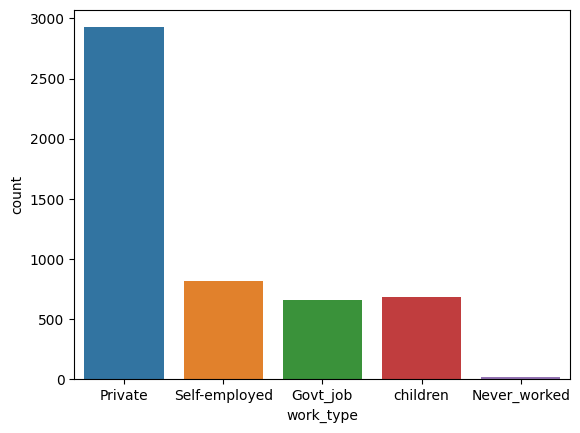

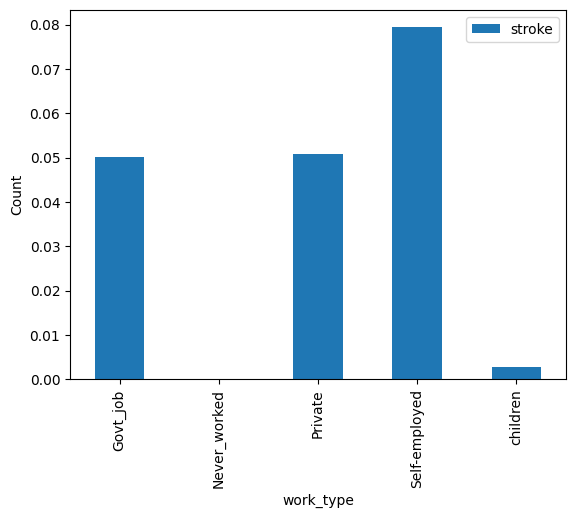

In [50]:
sns.countplot(x=stroke_data['work_type'])

stroke_data.groupby(['work_type'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
stroke_data.groupby(['work_type'])[['stroke']].mean()

Work Type chi-squared test

In [51]:
chisqt = pd.crosstab(stroke_data.work_type, stroke_data.stroke, margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

(1.1614713657633202, 0.5594866104012024, 2)


Below we have a bar chart showing smoking status in relation to strokes. Noted that the data includes a significant number of individuals who never smoked and unknowns. Based on the data that we have, it appears that individuals who formerly smoked have a higher ratio of strokes.



,stroke
smoking_status,
Unknown,0.030440
formerly smoked,0.079096
never smoked,0.047569
smokes,0.053232


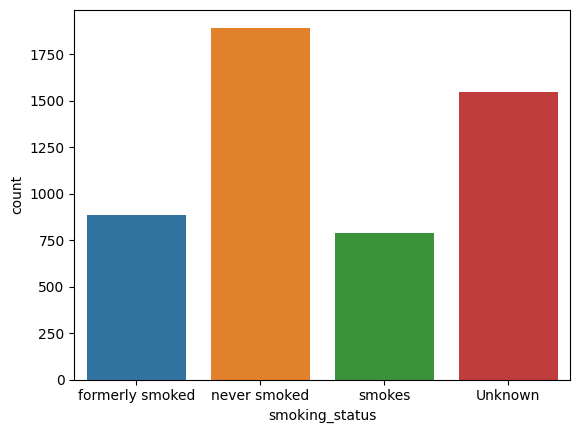

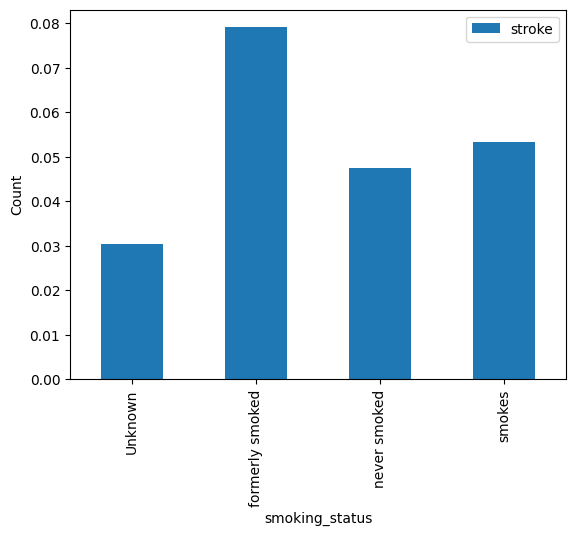

In [52]:
sns.countplot(x=stroke_data['smoking_status'])

stroke_data.groupby(['smoking_status'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
stroke_data.groupby(['smoking_status'])[['stroke']].mean()

Smoking Status chi-squared test

In [53]:
chisqt = pd.crosstab(stroke_data.smoking_status, stroke_data.stroke, margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

(29.047623229232553, 4.924801830448134e-07, 2)


Below we have a histogram and box plot showing Age in relation to strokes. Based on the data that we have, it appears that individuals who have had a stroke have a higher mean age than individuals who have not had a stroke.


,mean,std
stroke,,
0,41.971545,22.291940
1,67.728193,12.727419


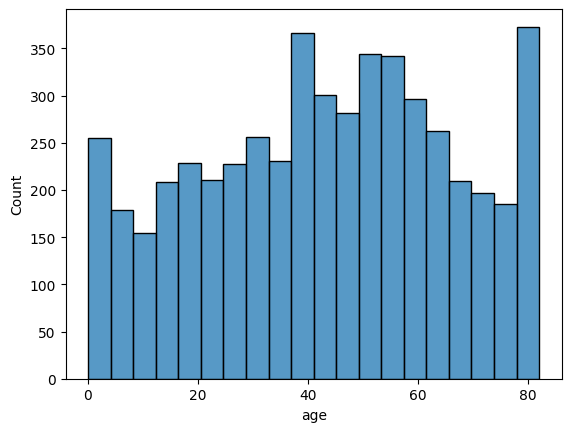

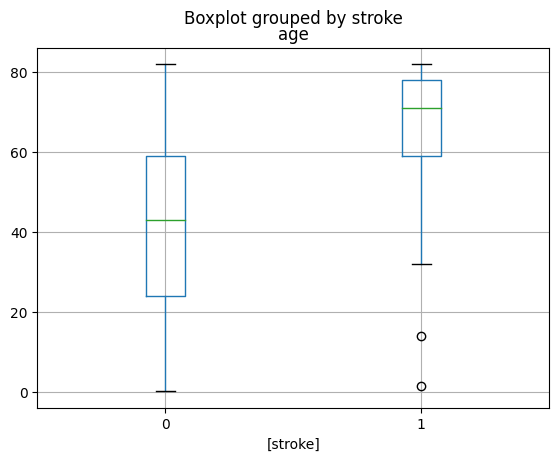

In [54]:
sns.histplot(data=stroke_data, x="age")

stroke_data.boxplot(column=['age'],by = ['stroke'])
pd.DataFrame(stroke_data.groupby( ['stroke'])['age'].describe().loc[:,['mean','std']])

Age t-test

In [55]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
strokes_1 = stroke_data[stroke_data['stroke']==1]["age"]
no_strokes_1 = stroke_data[stroke_data['stroke']==0]["age"]
stats.ttest_ind(strokes_1, no_strokes_1, equal_var=True)

<ipython-input-55-306e03489f26>:4: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.ttest_ind(strokes_1, no_strokes_1, equal_var=True)


Ttest_indResult(statistic=18.08083426887953, pvalue=7.0307775129939774e-71)

Below we have a histogram and box plot showing Avg Glucose Level in relation to strokes.

,mean,std
stroke,,
0,104.795513,43.846069
1,132.544739,61.921056


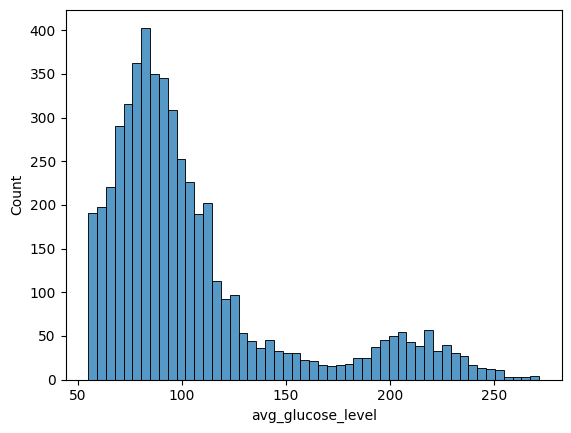

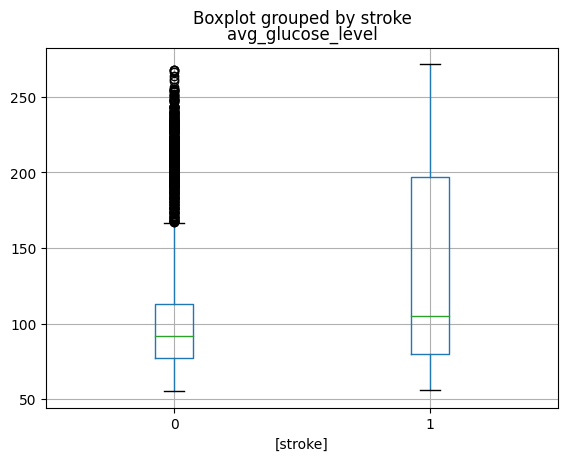

In [56]:
sns.histplot(data=stroke_data, x="avg_glucose_level")

stroke_data.boxplot(column=["avg_glucose_level"],by = ['stroke'])
pd.DataFrame(stroke_data.groupby( ['stroke'])["avg_glucose_level"].describe().loc[:,['mean','std']])

Avg Glucose Level t-test

In [57]:
strokes_2 = stroke_data[stroke_data['stroke']==1]["avg_glucose_level"]
no_strokes_2 = stroke_data[stroke_data['stroke']==0]["avg_glucose_level"]
stats.ttest_ind(strokes_2, no_strokes_2, equal_var=True)

<ipython-input-57-62410d9c21e4>:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.ttest_ind(strokes_2, no_strokes_2, equal_var=True)


Ttest_indResult(statistic=9.513352175431471, pvalue=2.7678105194741054e-21)

Below we have a histogram and box plot showing BMI in relation to strokes.

,mean,std
stroke,,
0,28.825388,7.776203
1,30.217789,5.825589


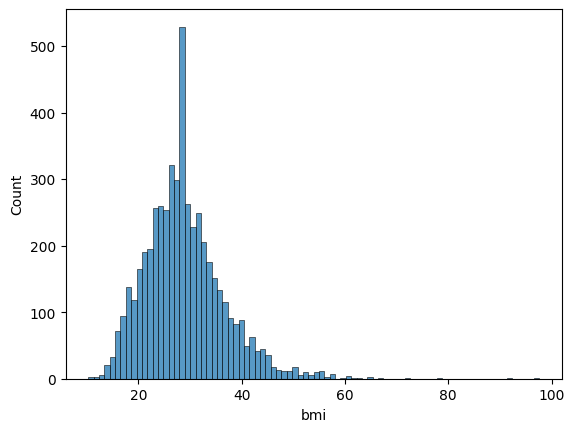

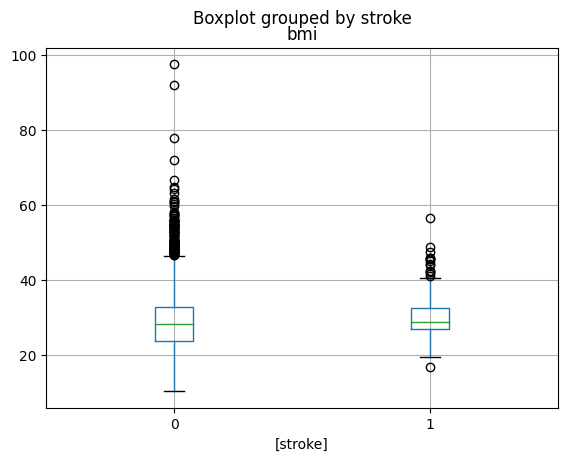

In [58]:
sns.histplot(data=stroke_data, x="bmi")

stroke_data.boxplot(column=["bmi"],by = ['stroke'])
pd.DataFrame(stroke_data.groupby( ['stroke'])["bmi"].describe().loc[:,['mean','std']])

BMI t-test

In [59]:
strokes_3 = stroke_data[stroke_data['stroke']==1]["bmi"]
no_strokes_3 = stroke_data[stroke_data['stroke']==0]["bmi"]
stats.ttest_ind(strokes_3, no_strokes_3, equal_var=True)

<ipython-input-59-737d9a57df96>:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.ttest_ind(strokes_3, no_strokes_3, equal_var=True)


Ttest_indResult(statistic=2.785637387412078, pvalue=0.005361957129403666)

Below we have a Heat Map for all features. Noted that age and bmi appear to be slightly correlated, but the remaining features do not appear to be related.

<ipython-input-60-cc85ba2a2424>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stroke_data.corr());


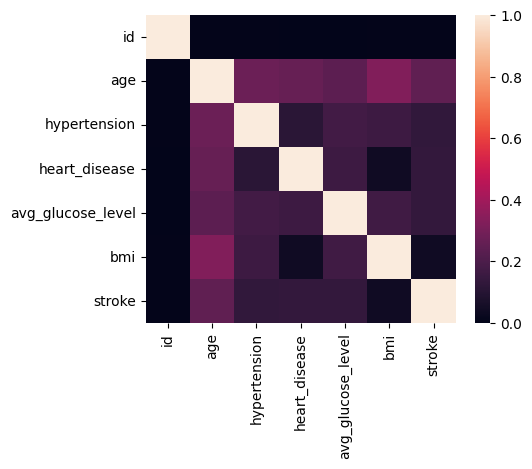

In [60]:
plt.subplots(figsize=(5,4))
sns.heatmap(stroke_data.corr());

In [61]:
datapath = '/content/drive/MyDrive/Springboard/Capstone 2'
save_file(stroke_data, 'stroke_data_3.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)N

Please re-run this cell with a new filename.
